<a href="https://colab.research.google.com/github/jangminsong/DCS210/blob/Project/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Jangmin Song
#Project 3

In [ ]:
install.packages("tidyverse")
install.packages("scales")
install.packages("fivethirtyeight")
library(tidyverse)
library(scales)
library(fivethirtyeight)

In [ ]:
glimpse(college_recent_grads)

Rows: 173
Columns: 21
$ rank                        <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,…
$ major_code                  <int> 2419, 2416, 2415, 2417, 2405, 2418, 6202, …
$ major                       <chr> "Petroleum Engineering", "Mining And Miner…
$ major_category              <chr> "Engineering", "Engineering", "Engineering…
$ total                       <int> 2339, 756, 856, 1258, 32260, 2573, 3777, 1…
$ sample_size                 <int> 36, 7, 3, 16, 289, 17, 51, 10, 1029, 631, …
$ men                         <int> 2057, 679, 725, 1123, 21239, 2200, 2110, 8…
$ women                       <int> 282, 77, 131, 135, 11021, 373, 1667, 960, …
$ sharewomen                  <dbl> 0.1205643, 0.1018519, 0.1530374, 0.1073132…
$ employed                    <int> 1976, 640, 648, 758, 25694, 1857, 2912, 15…
$ employed_fulltime           <int> 1849, 556, 558, 1069, 23170, 2038, 2924, 1…
$ employed_parttime           <int> 270, 170, 133, 150, 5180, 264, 296, 553, 1…
$ employed_fulltim

In [ ]:
college_recent_grads %>%
  arrange(unemployment_rate) %>%
  select(rank, major, unemployment_rate) %>%
  mutate(unemployment_rate = percent(unemployment_rate))

In [ ]:
college_recent_grads %>%
  arrange(desc(unemployment_rate)) %>%
  select(rank, major, unemployment_rate)


In [ ]:
#1
college_recent_grads %>%
  arrange(desc(sharewomen)) %>%
  select(major, total, sharewomen) %>%
  top_n(3)


Selecting by sharewomen


major,total,sharewomen
<chr>,<int>,<dbl>
Early Childhood Education,37589,0.9689537
Communication Disorders Sciences And Services,38279,0.9679981
Medical Assisting Services,11123,0.9278072


2. They use median because there could be a outlayer who can either bring up/down the mean by far.

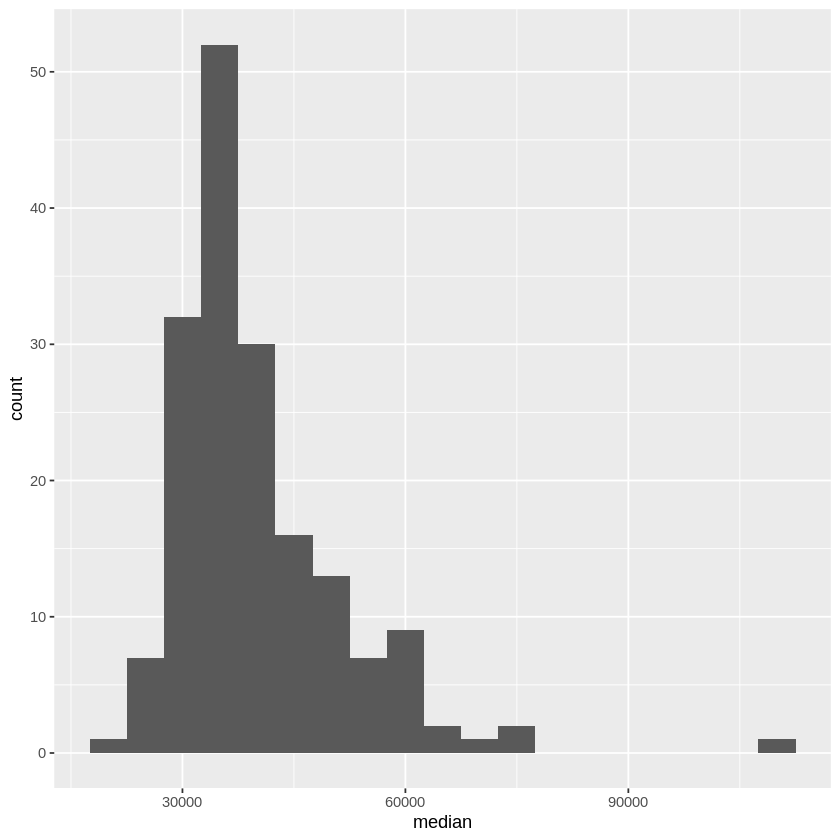

In [ ]:
#3
ggplot(data = college_recent_grads, mapping = aes(x = median)) +
geom_histogram(binwidth = 5000)


3.
The binwidth of 5000 is better because the median value would be too small to understand, if you use 1000 for the binwidth.



In [ ]:
#4
college_recent_grads %>%
  summarise(min = min(median), max = max(median),
  mean = mean(median), med = median(median), sd = sd(median),
  q1 = quantile(median, probs = 0.25),
  q3 = quantile(median, probs = 0.75))

min,max,mean,med,sd,q1,q3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22000,110000,40151.45,36000,11470.18,33000,45000


4. According to the summary statistics, meadian is useful for describing the distribution. The graph looks like a skew right, which means the mean is greater than center. The spread is max-min, which is 88,000. The unusual observation is the outlayer in maximum.

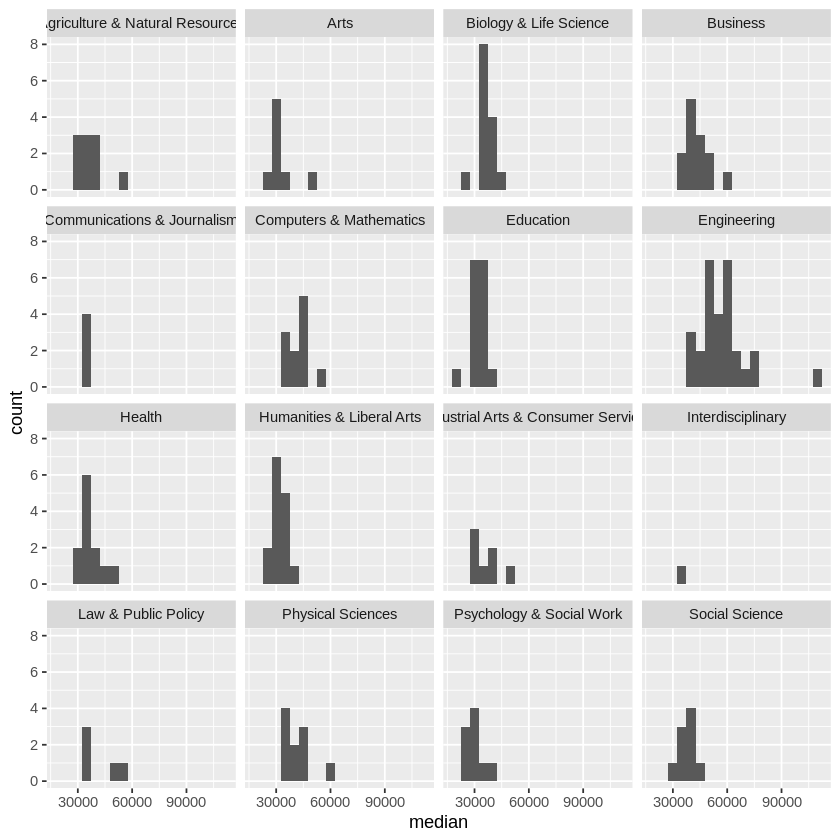

In [ ]:
#5
ggplot(data = college_recent_grads, mapping = aes(x = median)) +
  geom_histogram(binwidth = 5000) +
  facet_wrap(~major_category)


In [ ]:
#6
college_recent_grads %>%
group_by(major_category) %>%
summarise(median_income_rank = median(median)) %>%
arrange(desc(median_income_rank))

major_category,median_income_rank
<chr>,<dbl>
Engineering,57000
Computers & Mathematics,45000
Business,40000
Physical Sciences,39500
Social Science,38000
Biology & Life Science,36300
Law & Public Policy,36000
Agriculture & Natural Resources,35000
Communications & Journalism,35000


6. Enginerring has the highest median of income.

In [ ]:
#7
college_recent_grads %>%
  count(major_category) %>%
  arrange(n)


major_category,n
<chr>,<int>
Interdisciplinary,1
Communications & Journalism,4
Law & Public Policy,5
Industrial Arts & Consumer Services,7
Arts,8
Psychology & Social Work,9
Social Science,9
Agriculture & Natural Resources,10
Physical Sciences,10


7. Interdisciplinary is the least popular major category in this sample.

In [ ]:
#8
stem_categories <- c("Biology & Life Science", "Computers & Mathematics", "Engineering", "Physical Sciences")
college_recent_grads <- college_recent_grads %>%
mutate(major_type = ifelse(major_category %in% stem_categories, "stem", "not stem"))

college_recent_grads %>%
  filter(major_type == "stem", median < 36000 ) %>%
  summarise(major, median, p25th, p75th)

major,median,p25th,p75th
<chr>,<dbl>,<dbl>,<dbl>
Environmental Science,35600,25000,40200
Multi-Disciplinary Or General Science,35000,24000,50000
Physiology,35000,20000,50000
Communication Technologies,35000,25000,45000
Neuroscience,35000,30000,44000
Atmospheric Sciences And Meteorology,35000,28000,50000
Miscellaneous Biology,33500,23000,48000
Biology,33400,24000,45000
Ecology,33000,23000,42000


8. Environmental Science, Multi-Disciplinary Or General Science, Physiology,Communication Technologies, Neuroscience, Atmospheric Sciences And Meteorology, Miscellaneous Biology, Biology, Ecology, and Zoology have median salaries equal to or less than the median for all majors’ median earnings according to the data.

Warning message:
“Removed 1 rows containing missing values (geom_point).”


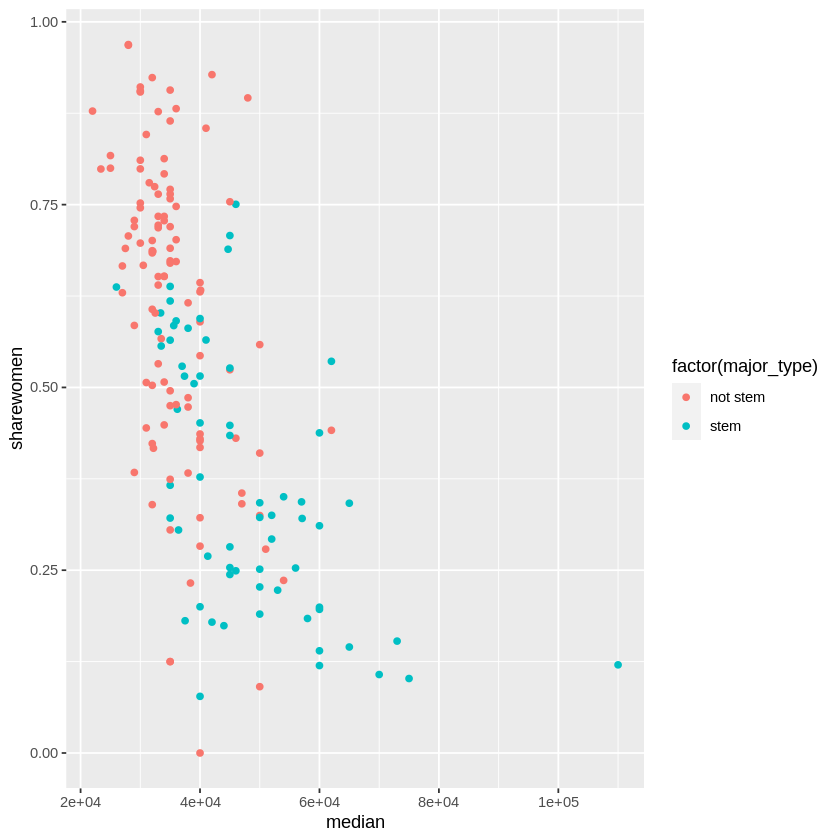

In [ ]:
#9
ggplot(college_recent_grads, aes(x = median, y = sharewomen)) +
  geom_point(aes(color = factor(major_type)))


9. The proportion of women in stem is less than non-stem.

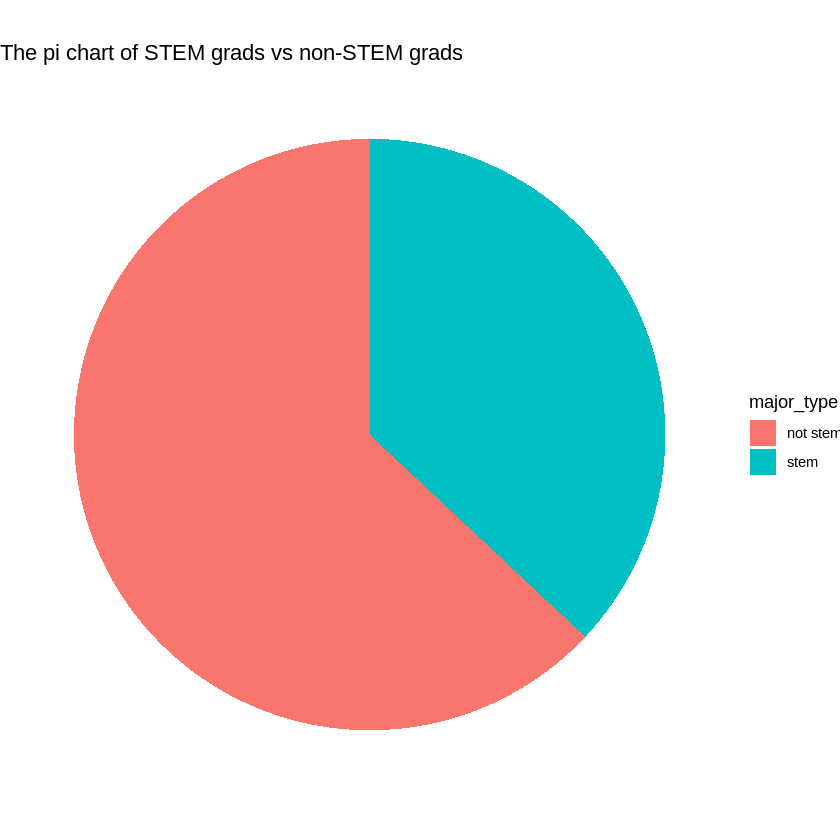

In [ ]:
#10
ggplot(college_recent_grads, aes(x="",y="", fill= major_type)) +
  geom_col() +
  coord_polar(theta = "y") +
  labs(
    title = "The pi chart of STEM grads vs non-STEM grads",
    y = "",
    x = "") +
  theme_void()

10. According to the pi chart, we know that there are more non-stem grads than stem grads.